In [1]:
from math import *
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import colors


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:70: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


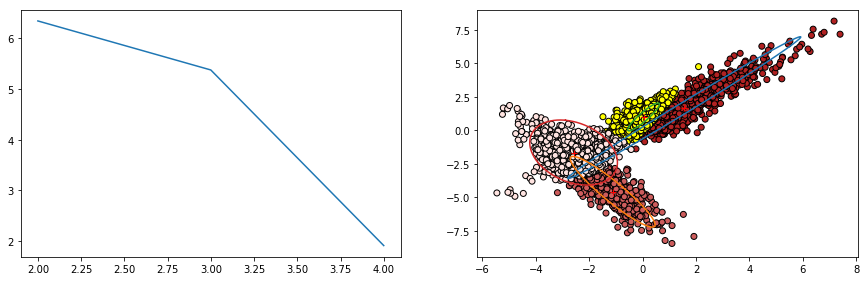

In [2]:
class Cluster:

    #covariance = cov
    def __init__(self, arr, cov, mean):
        self.arr = arr
        self.cov = cov      #old covevrgance, from cluster before
        self.mean = mean

# load the data by one
def loadData(filename):
    file = open(filename, 'r')
    digitarrs = []
    for line in file:
        arr = list(map(float, line.split(',')))
        digitarrs.append(arr)
    file.close()
    return digitarrs

def backup_clusterarr(clusters):
    for i in range(len(clusters)):
        clusters[i].old_arr = clusters[i].arr
        clusters[i].arr = []

def return_backup_clusterarr(clusters):
    for i in range(len(clusters)):
        clusters[i].arr = clusters[i].old_arr
        clusters[i].cov = clusters[i].old_cov
        clusters[i].mean = clusters[i].old_mean

def distance(vektor, center, cov):
    dif = vektor - center
    #dif.shape = (len(dif), 1)
    if array_equal(cov, identity(2)):
        mult = dif
    else:
        mult = matmul(dif, cov ** (-1))
    distance = matmul(mult, dif)
    return distance

def checkifthesame(clusters, first_cycle):
    same = True
    old_guete = guete(clusters)
    #poltguete([old_guete], clusters)
    for cluster in clusters:
        # what if some cluster doesn't have points(arr is empty)?
        if len(cluster.arr) < 2:
            return True
        cluster.old_mean = cluster.mean
        cluster.old_cov = cluster.cov
        cluster.mean = mean(cluster.arr, axis=0) #check if this work, maybe wrong achse
        cluster.cov = cov(transpose(cluster.arr))  ## must I to transpose
    new_guete = guete(clusters)
    if first_cycle:
        return False
    else:
        same = new_guete > old_guete
    return same

def splittedInCluster(arr, clusters):
    numberofcluster = len(clusters)
    notsame = True
    first_cycle = True
    while notsame:
        backup_clusterarr(clusters)
        for vector in arr:
            distances = []
            for i in range(numberofcluster):
                distances.append(distance(vector, clusters[i].mean, clusters[i].cov))
            cluster_assign_index = argmin(distances)
            if clusters[cluster_assign_index].arr == []:
                clusters[cluster_assign_index].arr = array(vector, ndmin=2)
            else:
                clusters[cluster_assign_index].arr = vstack((clusters[cluster_assign_index].arr, vector))
        notsame = not checkifthesame(clusters, first_cycle)
        first_cycle = False
    return_backup_clusterarr(clusters)
    return clusters

def initalizeClusters(numberofcluster, arr):
    numberOfVector = len(arr)
    clusters = []
    for i in range(numberofcluster):
        r = random.randint(1, numberOfVector)
        mean = arr[r]
        cov = identity(2)
        cluster = Cluster([], cov, mean)
        clusters.append(cluster)
    return clusters

def clustering(arr, numberofcluster):
        # fuer jeder cluster
        # 1) cluster finded
        # 2) covarianz bekommen und Guete berechnen
    clusters = initalizeClusters(numberofcluster, arr)
    clustersnew = splittedInCluster(arr, clusters)
    return clustersnew


def guete(clusters):
    guete = 0
    for i in range(len(clusters)):
        guete += linalg.det(clusters[i].cov)
    return guete

def poltguete(guetes, clusters):
    x = []
    y = []
    for i in range(len(guetes)):
        x.append(i+2)
        y.append(guetes[i])
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.plot(x, y)
    plt.subplot(2, 2, 2)
    for i in range(len(clusters)):
        #Farbe zu generieren
        color_ = colors.cnames.items()[i + 3]
        a, b = zip(*clusters[i].arr)
        plt.scatter(a, b, color=color_, edgecolors="black")

        num_points = len(clusters[i].arr)
        radius = 2
        arcs = linspace(0, 2 * pi, num_points)
        x = radius * sin(arcs)
        y = radius * cos(arcs)
        xy = array(list(zip(x, y)))
        x, y = zip(*xy.dot(clusters[i].cov))
        x += clusters[i].mean[0]
        y += clusters[i].mean[1]
        plt.plot(x, y)
        plt.plot(clusters[i].mean[0], clusters[i].mean[1], 'r+')

    plt.show()

def k_means():
    filename = './datasource/2d-em.csv'
    lists = loadData(filename)
    arr = array(lists)
    guetes = []
    for i in range(2, 5):
        clusters = clustering(arr, i)
        guetes.append(guete(clusters))
    poltguete(guetes, clusters)



k_means()